# Wifi Data ML

### Import Statements


In [419]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, mean_absolute_error, f1_score , recall_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Analysis (Initial)

In [420]:
df = pd.read_csv('trainingData.csv')
validiation = pd.read_csv('validationData.csv')

In [421]:
df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [422]:
train_col = df.columns[:520]
X = df[train_col]
Validation_X = validiation[train_col]
# y = df['BUILDINGID']

In [423]:
di = {0:0,1:0,2:0,3:0,4:0}
for i in validiation['FLOOR']:
    di[i] += 1

In [424]:
di

{0: 132, 1: 462, 2: 306, 3: 172, 4: 39}

### Data Visualisation

### Training and testing

In [426]:
def classification_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
#     sns.heatmap(cm, annot=True)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(cmn*100, annot=True, fmt='.1f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Normalised Confusion Matrix')
    plt.show(block=False)
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt = '.1f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Actual Confusion Matrix')
    
#     print("Accuracy score : ",accuracy_score(y_test, y_pred))
#     print("F1 score : ", f1_score(y_test, y_pred))
#     print("Recall score : ",recall_score(y_test,y_pred))
    print()
    print(classification_report(y_test,y_pred))
    

### Classification 

In [427]:
y = df['BUILDINGID']
validation_y = validiation['BUILDINGID']

# --------------------------------------------
# y = df['RELATIVEPOSITION']
# validation_y = validiation['RELATIVEPOSITION']

# -------------------------------------------------
# y = df['USERID']
# validation_y = validiation['USERID']

#------------------------------------------
# y = df['FLOOR']
# validation_y = validiation['FLOOR']

##### KNN Classifier

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

model = KNeighborsClassifier(n_neighbors=5) # Value found using n**0.5
model.fit(X_train, y_train)

KNeighborsClassifier()

0.9977432296890673


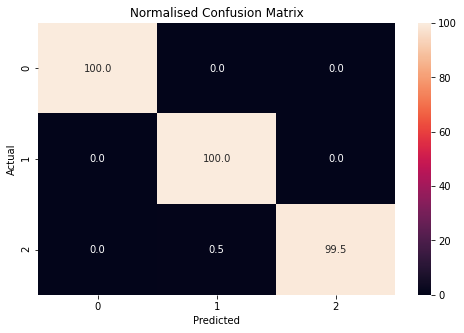


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       0.99      1.00      1.00      1001
           2       1.00      1.00      1.00      1909

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988



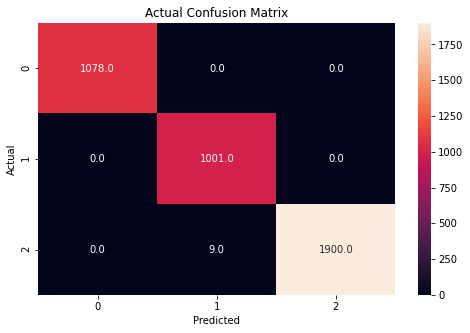

In [429]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
classification_metrics(y_test,y_pred)


In [430]:
# a = classification_report(y_test,y_pred, output_dict=True)
# df = pd.DataFrame(a).transpose()
# df.to_csv('temp.csv')

Text(0.5, 1.0, 'Accuracy on Validation data')

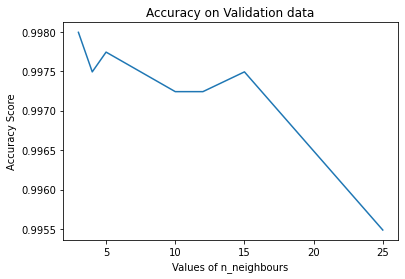

In [416]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [3,4,5,10,12,15,20,25]
for i in n_values:
    accuracy.append(accuracy_score(y_test,KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train).predict(X_test)))
plt.plot(n_values, accuracy)
plt.xlabel("Values of n_neighbours")
plt.ylabel("Accuracy Score")
plt.title("Accuracy on Validation data")

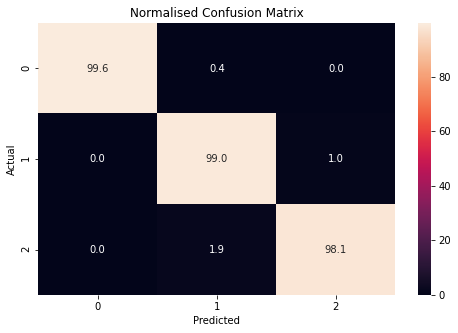


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.98      0.99      0.98       307
           2       0.99      0.98      0.99       268

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111



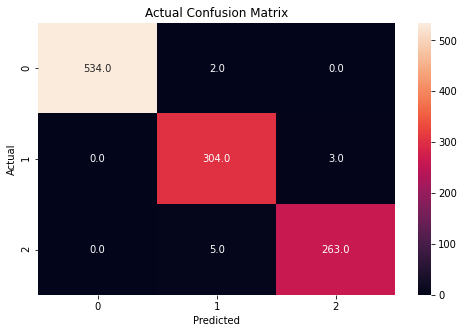

In [431]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
y_pred = model.predict(Validation_X)
classification_metrics(validation_y,y_pred)

#### Decision Tree


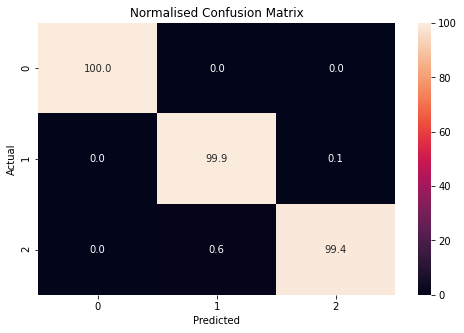


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       0.99      1.00      0.99      1001
           2       1.00      0.99      1.00      1909

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Accuracy score :  0.9969909729187563


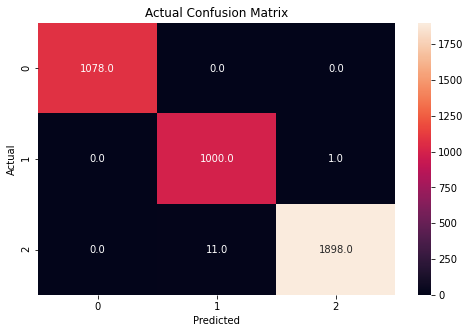

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

model = DecisionTreeClassifier(max_depth=30,random_state=42) # Value found using n**0.5
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
classification_metrics(y_test,y_pred)
print("Accuracy score : ", accuracy_score(y_test, y_pred))

In [433]:
# a = classification_report(y_test,y_pred, output_dict=True)
# df = pd.DataFrame(a).transpose()
# df.to_csv('temp.csv')

Text(0.5, 1.0, 'Accuracy on Validation data')

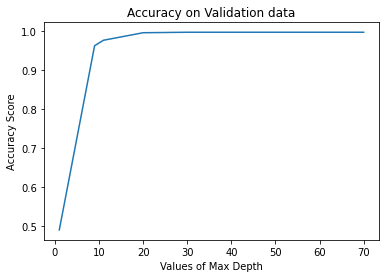

In [434]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [1,9,11,20,30,50,55,60,70]
for i in n_values:
    accuracy.append(accuracy_score(y_test,DecisionTreeClassifier(max_depth=i, random_state=42).fit(X_train,y_train).predict(X_test)))

plt.plot(n_values, accuracy)
plt.xlabel("Values of Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Accuracy on Validation data")

In [435]:
model = DecisionTreeClassifier(max_depth= 50, random_state=42)
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
accuracy_score(validation_y, y_pred)


0.9891989198919892

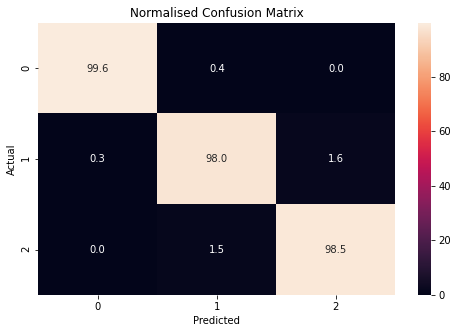


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.98      0.98      0.98       307
           2       0.98      0.99      0.98       268

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111



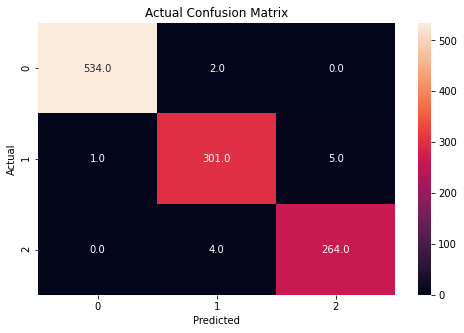

In [436]:
classification_metrics(validation_y,y_pred)

#### SVM

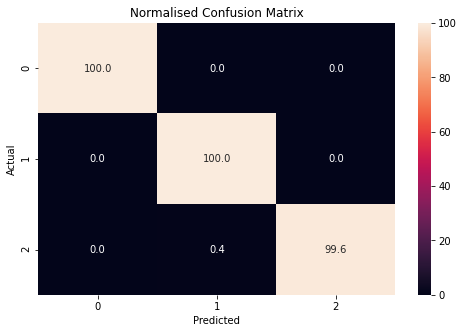


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       0.99      1.00      1.00      1001
           2       1.00      1.00      1.00      1909

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Accuracy score :  0.9979939819458375


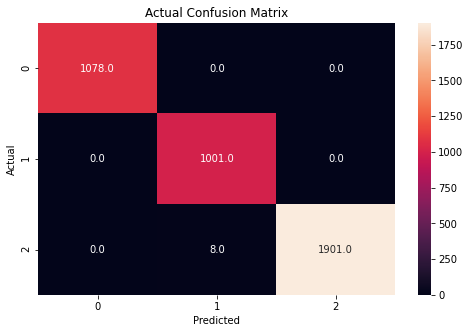

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

model = SVC(random_state=42) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
classification_metrics(y_test,y_pred)
print("Accuracy score : ", accuracy_score(y_test, y_pred))

In [438]:
# a = classification_report(y_test,y_pred, output_dict=True)
# df = pd.DataFrame(a).transpose()
# df.to_csv('temp.csv')

In [439]:
# accuracy = []
# # All n values taken of the form 3*x + 1
# kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
# for i in kernel_values:
#     accuracy.append(accuracy_score(y_test,SVC(kernel=i, random_state=42).fit(X_train,y_train).predict(X_test)))

# plt.plot(n_values, accuracy)
# plt.xlabel("Values of n_neighbours")
# plt.ylabel("Accuracy Score")
# plt.title("Accuracy on Validation data")

0.9972997299729973


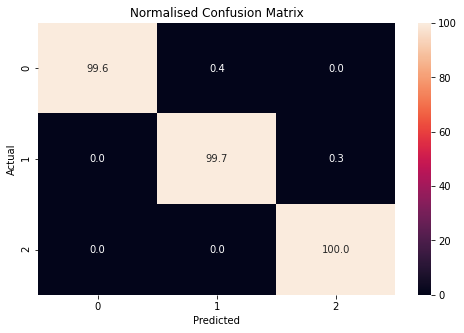


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.99      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



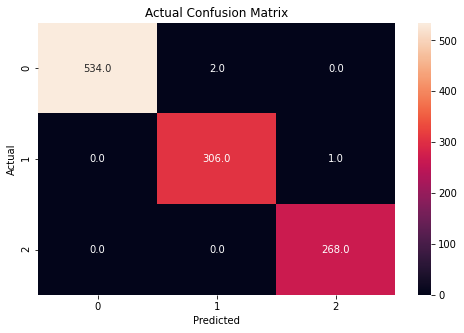

In [440]:
model = SVC(random_state=42)
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
print(accuracy_score(validation_y, y_pred))

classification_metrics(validation_y,y_pred)

### Regression

In [441]:
def Regression_Report(y_test, y_pred, floor = 0):
#     if(floor == 1):
#         for i in range(len(y_pred)):
#             if y_pred[i] <= 0.5:
#                 y_pred[i] = 0
#             elif y_pred[i] <= 1.5:
#                 y_pred[i] = 1
#             elif y_pred[i] <= 2.5:
#                 y_pred[i] = 2
#             elif y_pred[i] <= 3.5:
#                 y_pred[i] = 3
#             else :
#                 y_pred[i] = 4
    print("Different metrics for Regression ")
    print("r2 Score -> ",r2_score(y_test,y_pred))
    print("Mean Square Error -> ",mean_squared_error(y_test,y_pred))    
    print("Mean Absolute Error -> ",mean_absolute_error(y_test,y_pred))    

In [442]:
# y = df['LATITUDE']
# validation_y = validiation['LATITUDE']
y = df['LONGITUDE']
validation_y = validiation['LONGITUDE']
# y = df['FLOOR']
# validation_y = validiation['FLOOR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
reg = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
y_pred = reg.predict(X_test)
Regression_Report(y_test,y_pred)

Different metrics for Regression 
r2 Score ->  0.9942318398021389
Mean Square Error ->  89.70306987093318
Mean Absolute Error ->  4.640897274302618


Text(0.5, 1.0, 'r2 Score on Validation data')

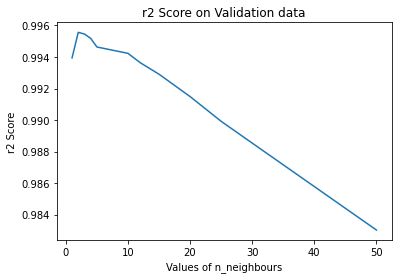

In [443]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [1,2,3,4,5,10,12,15,20,25,30,50]
for i in n_values:
    accuracy.append(r2_score(y_test,KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train).predict(X_test)))
plt.plot(n_values, accuracy)
plt.xlabel("Values of n_neighbours")
plt.ylabel("r2 Score")
plt.title("r2 Score on Validation data")

In [444]:
model = KNeighborsRegressor( n_neighbors = 5)
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
Regression_Report(validation_y, y_pred)

Different metrics for Regression 
r2 Score ->  0.9791106664325112
Mean Square Error ->  301.5851135004018
Mean Absolute Error ->  9.185529146930893


### Decision Tree Regressor

In [445]:
reg = DecisionTreeRegressor(max_depth=20,random_state=42).fit(X_train, y_train)
y_pred = reg.predict(X_test)
Regression_Report(y_test,y_pred)

Different metrics for Regression 
r2 Score ->  0.9841096846996341
Mean Square Error ->  247.11693412891645
Mean Absolute Error ->  6.719553834149572


Text(0.5, 1.0, 'r2 Score on Validation data')

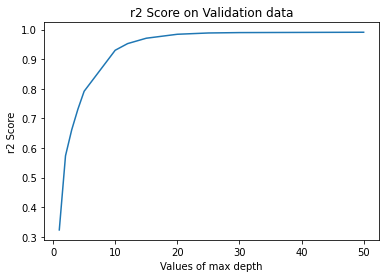

In [446]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [1,2,3,4,5,10,12,15,20,25,30,50]
for i in n_values:
    accuracy.append(r2_score(y_test,DecisionTreeRegressor(max_depth=i,random_state=42).fit(X_train,y_train).predict(X_test)))
plt.plot(n_values, accuracy)
plt.xlabel("Values of max depth")
plt.ylabel("r2 Score")
plt.title("r2 Score on Validation data")

In [447]:
model = DecisionTreeRegressor(max_depth= 20,random_state=42)
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
Regression_Report(validation_y, y_pred)

Different metrics for Regression 
r2 Score ->  0.9064991916715153
Mean Square Error ->  1349.8971521050396
Mean Absolute Error ->  17.682009927482074


### SVR

In [448]:
reg = SVR().fit(X_train, y_train)
y_pred = reg.predict(X_test)
Regression_Report(y_test,y_pred)

Different metrics for Regression 
r2 Score ->  0.9706924291532063
Mean Square Error ->  455.77428248128786
Mean Absolute Error ->  13.797298822568601


In [449]:
model = SVR()
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
Regression_Report(validation_y, y_pred)

Different metrics for Regression 
r2 Score ->  0.9305345112974656
Mean Square Error ->  1002.8925636632056
Mean Absolute Error ->  23.31543367995491


### Floor Classification/Regression


In [450]:
train_col
X

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19933,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [451]:
X = X.replace(to_replace=100, value=-105)
Validation_X = Validation_X.replace(to_replace=100, value=-105)

In [452]:
y = df['FLOOR']
validation_y = validiation['FLOOR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [453]:
reg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred = reg.predict(X_test)
Regression_Report(y_test,y_pred,floor = 1)

Different metrics for Regression 
r2 Score ->  0.9847983779399838
Mean Square Error ->  0.02262788365095286
Mean Absolute Error ->  0.01213640922768305


Text(0.5, 1.0, 'r2 Score on Validation data')

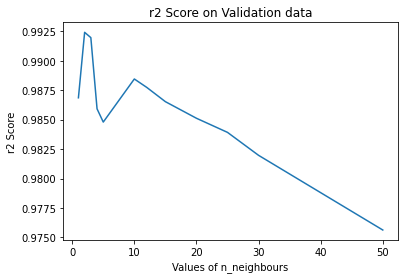

In [454]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [1,2,3,4,5,10,12,15,20,25,30,50]
for i in n_values:
    accuracy.append(r2_score(y_test,KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train).predict(X_test)))
plt.plot(n_values, accuracy)
plt.xlabel("Values of n_neighbours")
plt.ylabel("r2 Score")
plt.title("r2 Score on Validation data")

In [455]:
model = KNeighborsRegressor( n_neighbors = 10)
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
Regression_Report(validation_y, y_pred, floor = 1)

Different metrics for Regression 
r2 Score ->  0.8734898951460829
Mean Square Error ->  0.12685868586858687
Mean Absolute Error ->  0.11791179117911792


### KNN Classifier

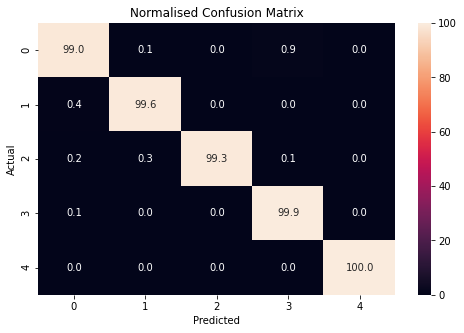


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       886
           1       1.00      1.00      1.00      1010
           2       1.00      0.99      1.00       882
           3       0.99      1.00      1.00       998
           4       1.00      1.00      1.00       212

    accuracy                           0.99      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       0.99      0.99      0.99      3988

Accuracy score :  0.9949849548645938


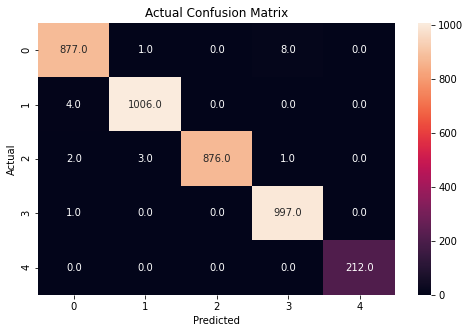

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

model = KNeighborsClassifier(n_neighbors=5) # Value found using n**0.5
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
classification_metrics(y_test,y_pred)
print("Accuracy score : ", accuracy_score(y_test, y_pred))

Text(0.5, 1.0, 'Accuracy on Validation data')

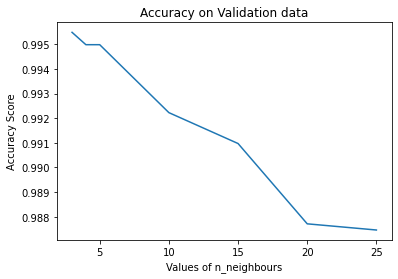

In [457]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [3,4,5,10,12,15,20,25]
for i in n_values:
    accuracy.append(accuracy_score(y_test,KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train).predict(X_test)))
plt.plot(n_values, accuracy)
plt.xlabel("Values of n_neighbours")
plt.ylabel("Accuracy Score")
plt.title("Accuracy on Validation data")

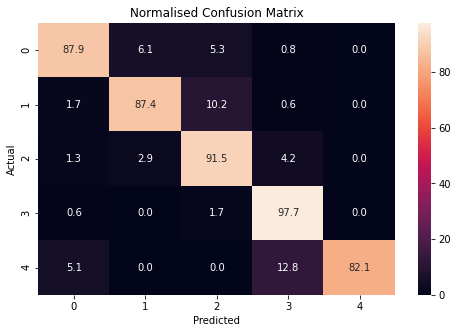


              precision    recall  f1-score   support

           0       0.89      0.88      0.88       132
           1       0.96      0.87      0.92       462
           2       0.83      0.92      0.87       306
           3       0.88      0.98      0.93       172
           4       1.00      0.82      0.90        39

    accuracy                           0.90      1111
   macro avg       0.91      0.89      0.90      1111
weighted avg       0.91      0.90      0.90      1111

0.9000900090009001


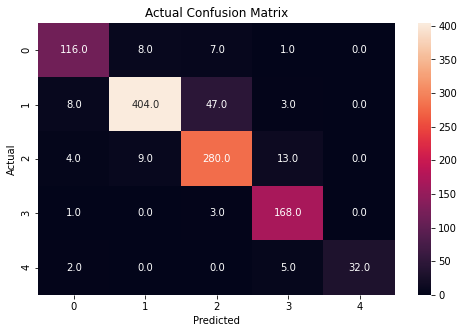

In [458]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
y_pred = model.predict(Validation_X)
classification_metrics(validation_y,y_pred)
print(accuracy_score(validation_y,y_pred))

### Decision Tree Regressor

In [459]:
reg = DecisionTreeRegressor(max_depth=30,random_state=42).fit(X_train, y_train)
y_pred = reg.predict(X_test)
Regression_Report(y_test,y_pred)

Different metrics for Regression 
r2 Score ->  0.9582839679884794
Mean Square Error ->  0.06209505242331399
Mean Absolute Error ->  0.06462945255150115


Text(0.5, 1.0, 'r2 Score on Validation data')

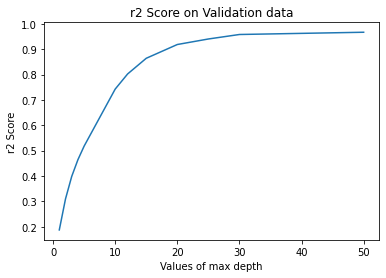

In [460]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [1,2,3,4,5,10,12,15,20,25,30,50]
for i in n_values:
    accuracy.append(r2_score(y_test,DecisionTreeRegressor(max_depth=i,random_state=42).fit(X_train,y_train).predict(X_test)))
plt.plot(n_values, accuracy)
plt.xlabel("Values of max depth")
plt.ylabel("r2 Score")
plt.title("r2 Score on Validation data")

In [461]:
model = DecisionTreeRegressor(max_depth= 30,random_state=42)
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
Regression_Report(validation_y, y_pred)

Different metrics for Regression 
r2 Score ->  0.6697365824175899
Mean Square Error ->  0.3311734125376914
Mean Absolute Error ->  0.28287688673553374


### Decision Tree Classifier

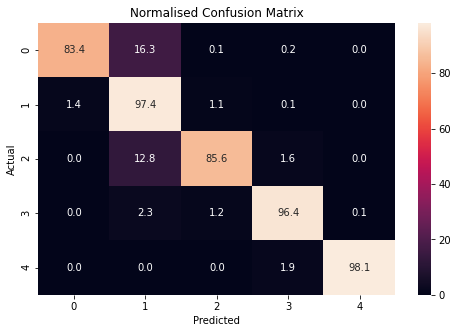


              precision    recall  f1-score   support

           0       0.98      0.83      0.90       886
           1       0.78      0.97      0.87      1010
           2       0.97      0.86      0.91       882
           3       0.98      0.96      0.97       998
           4       1.00      0.98      0.99       212

    accuracy                           0.91      3988
   macro avg       0.94      0.92      0.93      3988
weighted avg       0.93      0.91      0.92      3988

Accuracy score :  0.9147442326980942


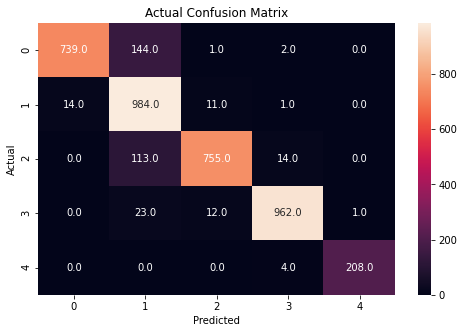

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

model = DecisionTreeClassifier(max_depth=30,random_state=42) # Value found using n**0.5
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
classification_metrics(y_test,y_pred)
print("Accuracy score : ", accuracy_score(y_test, y_pred))

Text(0.5, 1.0, 'Accuracy on Validation data')

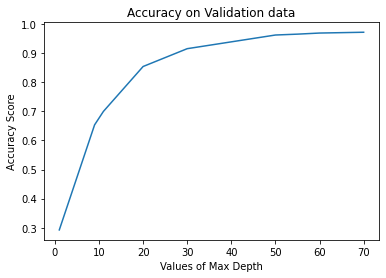

In [463]:
accuracy = []
# All n values taken of the form 3*x + 1
n_values = [1,9,11,20,30,50,55,60,70]
for i in n_values:
    accuracy.append(accuracy_score(y_test,DecisionTreeClassifier(max_depth=i, random_state=42).fit(X_train,y_train).predict(X_test)))

plt.plot(n_values, accuracy)
plt.xlabel("Values of Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Accuracy on Validation data")

In [464]:
model = DecisionTreeClassifier(max_depth= 30, random_state=42)
model.fit(X,y)
y_pred = model.predict(Validation_X)
# confusion_matrix(validation_y, y_pred)
accuracy_score(validation_y, y_pred)


0.8046804680468047

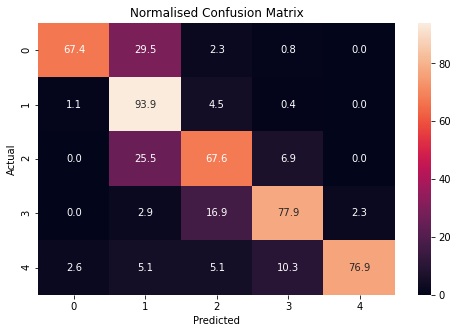


              precision    recall  f1-score   support

           0       0.94      0.67      0.78       132
           1       0.78      0.94      0.85       462
           2       0.79      0.68      0.73       306
           3       0.83      0.78      0.80       172
           4       0.88      0.77      0.82        39

    accuracy                           0.80      1111
   macro avg       0.84      0.77      0.80      1111
weighted avg       0.81      0.80      0.80      1111



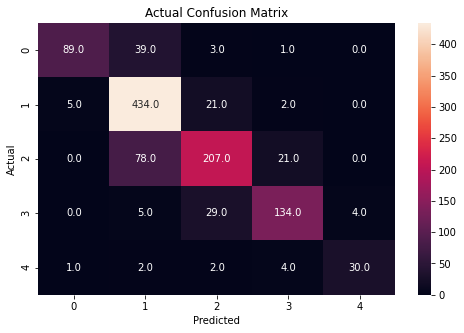

In [465]:
classification_metrics(validation_y,y_pred)